In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('adult.csv')

In [12]:
#Find out the numerical and categorical variables in the data. If any variable is wrongly identified, do the needful
df.info()
df.dtypes
df['sex']=df['sex'].astype('object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
#2. What is the average age of males and females in the data?
df['age'].mean()
df.groupby('sex')['age'].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

In [17]:
#3.what is the value under which 95% of the capital gain would lie? 
df['capital.gain'].quantile(0.95)

5013.0

In [19]:
df.head(1)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K


In [27]:
#4.What is the percentage of the Asian-Pac-Islander race people in the data?
df['race'].value_counts()/len(df)*100

White                 85.427352
Black                  9.594300
Asian-Pac-Islander     3.190934
Amer-Indian-Eskimo     0.955130
Other                  0.832284
Name: race, dtype: float64

In [33]:
#5Which occupation has more variability in the working hours
df.groupby(['occupation'])['hours.per.week'].var().max()

299.9878140950437

In [34]:
#What is the range of the middle 50% of working hours per week?
df['hours.per.week'].quantile(0.75)-df['hours.per.week'].quantile(0.20)

10.0

# Day2

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df_insurance = pd.read_csv('health_insurance.csv')
df_insurance.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


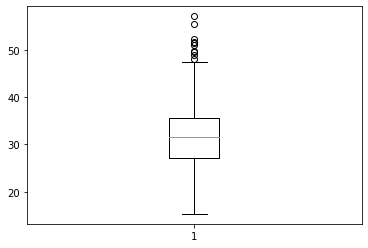

In [38]:
#Are there any extreme observations present in 'bmi'? Support your answer with a plot
plt.boxplot(df_insurance['bmi'])
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

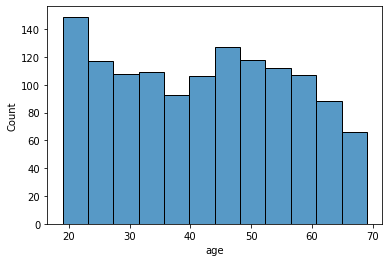

In [40]:
# Is the variable 'age' skewed? Support your answer with a plot and metric
sns.histplot(df_insurance['age'])

(array([ 27., 104., 244., 314., 328., 178.,  70.,  26.,   7.,   2.]),
 array([15.29 , 19.474, 23.658, 27.842, 32.026, 36.21 , 40.394, 44.578,
        48.762, 52.946, 57.13 ]),
 <BarContainer object of 10 artists>)

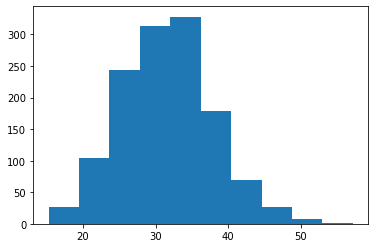

In [41]:
plt.hist(df_insurance['bmi'])

In [42]:
df_insurance.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


In [47]:
#Is there any individual with age less than 30 and meadical cost greater than 40k?
df_insurance[(df_insurance['age']<30) & (df_insurance['medical_cost'])].head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
7,26,F,21.845,140,0,northwest,non-smoker,2395.17155
12,28,F,15.385,147,1,southwest,non-smoker,2775.19215
14,24,F,39.600,145,0,southeast,smoker,35585.57600


<AxesSubplot:xlabel='age', ylabel='bmi'>

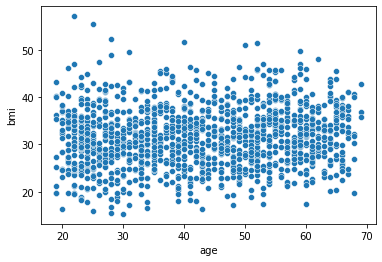

In [49]:
sns.scatterplot(x=df_insurance['age'],y=df_insurance['bmi'])

In [58]:
#Which region has the highest number of males?
df_insurance.head()
pd.crosstab(df_insurance['region'],df_insurance['gender'])

gender,F,M
region,,
northeast,174,141
northwest,149,166
southeast,178,178
southwest,156,158


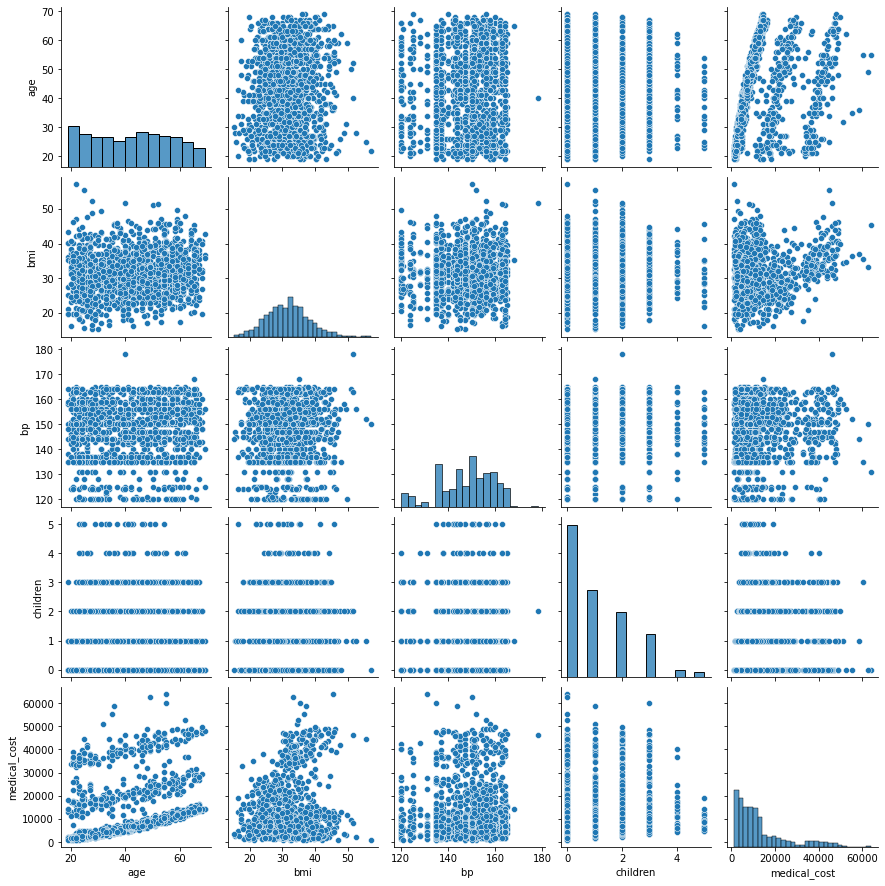

In [59]:
sns.pairplot(df_insurance)
plt.show()

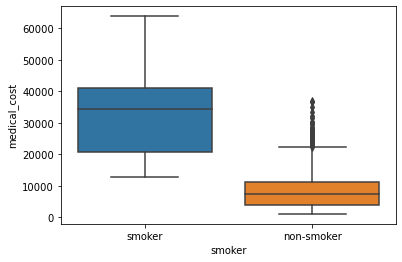

In [61]:
sns.boxplot(x='smoker',y='medical_cost', data = df_insurance)
plt.show()

In [64]:
#Create a dummy variable for each category in 'region'
pd.get_dummies(df_insurance['region']).head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [70]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder()
df_onehot=onehot.fit_transform(df_insurance['region'].values.reshape(-1,1)).toarray()
df_onehot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [75]:
#Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()
df_insurance['smoker']=labelEncoder.fit_transform(df_insurance.smoker)
df_insurance.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,1,16884.92400
1,20,F,36.770,160,1,southeast,0,1725.55230
2,33,F,35.000,145,3,southeast,0,4449.46200
3,37,F,23.705,153,0,northwest,0,21984.47061
4,36,F,27.880,156,0,northwest,0,3866.85520


In [77]:
#Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker
pd.get_dummies(df_insurance['smoker'],drop_first=True).head()

,1
0,1
1,0
2,0
3,0
4,0


In [ ]:
#Transform BMI such that it will have mean zero and variance one
#Normalization used

# Day4

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_insurance = pd.read_csv('health_insurance.csv')

In [6]:
#Are there any records where no data has been reported?
df_insurance.isna().sum()

age             0
gender          0
bmi             0
bp              0
children        0
region          0
smoker          0
medical_cost    0
dtype: int64

In [9]:
#Find a list of all the columns which have more than 60% of their values missing
df_insurance.isna().sum()

age             0
gender          0
bmi             0
bp              0
children        0
region          0
smoker          0
medical_cost    0
dtype: int64

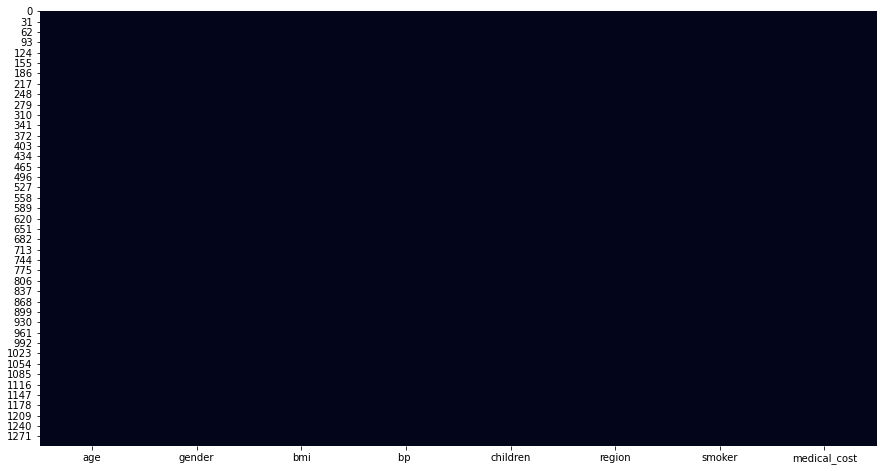

In [14]:
#Visualize the missing values in the data
plt.figure(figsize = (15,8))
sns.heatmap(df_insurance.isnull(),cbar = False)
plt.show()

In [17]:
#Eliminate all the records where no more than two observations have been recorded
df_insurance.dropna()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520
...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500


In [18]:
#Handling missing value
df_insurance=df_insurance.fillna(df_insurance.median())

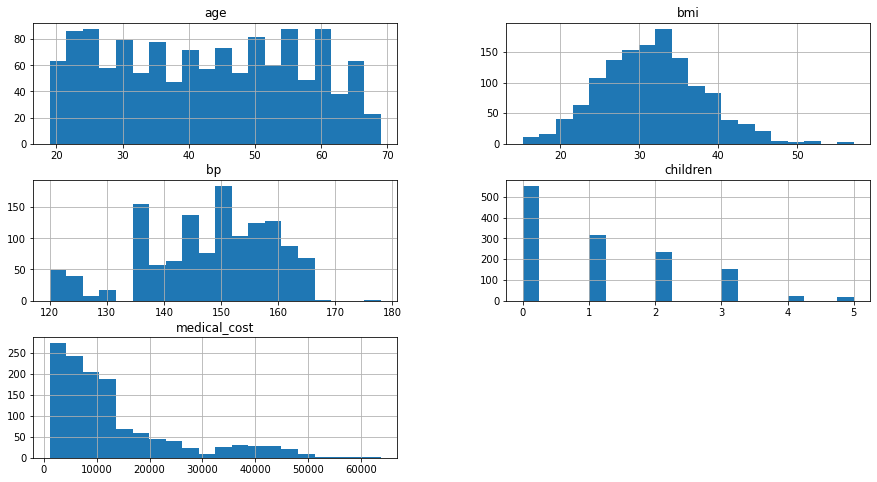

In [21]:
#Outlier detection
df_insurance.hist(bins=20, figsize = (15,8))
plt.show()

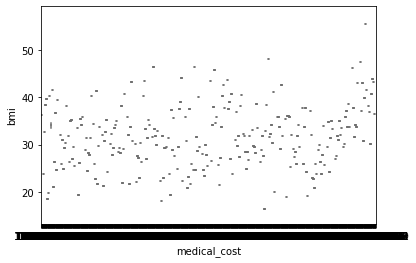

In [26]:
sns.boxplot(x = df_insurance['medical_cost'],y=df_insurance['bmi'], palette='pastel')
plt.show()

In [31]:
#Treatment for Outliers
Q1 = df_insurance['medical_cost'].quantile(0.25)
Q3 = df_insurance['medical_cost'].quantile(0.75)
IQR = Q3 - Q1
df_insurance_updated=df_insurance[ ~(df_insurance['medical_cost']<(Q1-1.5*IQR)) |  (df_insurance['medical_cost']<(Q3+1.5*IQR))]
df_insurance_updated.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


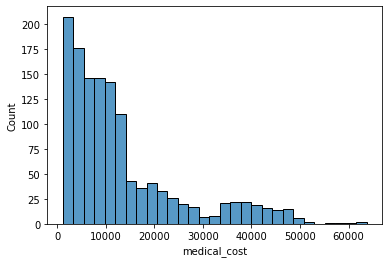

In [32]:
sns.histplot(df_insurance_updated['medical_cost'])
plt.show()

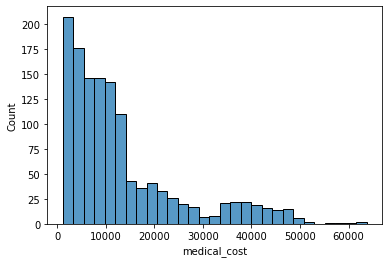

In [33]:
sns.histplot(df_insurance['medical_cost'])
plt.show()